# IPL Win Probability Predictor

---
---

## Problem Statement - 
Develop an IPL Win Probability Predictor using machine learning to dynamically assess and update the likelihood of victory for each team after every delivery, offering real-time insights into match dynamics and strategic advantages.

## IPL Win Probability Predictor: Real-time Forecasting and Strategic Insights with Advanced Machine Learning - 
IPL Win Probability Predictor is a machine learning model designed to dynamically forecast the chances of victory for cricket teams in the Indian Premier League (IPL) after every over. Leveraging advanced statistical algorithms and historical match data, the model calculates and updates the winning probabilities for both competing teams in real-time. By incorporating various factors such as runs scored, wickets taken, and other game-changing events, my model provides a comprehensive and insightful analysis of the evolving dynamics during an IPL match. This innovative approach not only enhances the viewing experience for cricket enthusiasts but also offers strategic insights for teams and analysts. The continuous prediction updates after each over contribute to a nuanced understanding of the game's progression, making your IPL Win Probability Predictor a valuable tool for both cricket enthusiasts and professionals involved in the sport.

In [129]:
## it is a classification model but we will use those algorithm which shows results in terms of probabilities.

## Importing Necessary Libraries

In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud as wc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,classification_report

## Reading Required Datasets.

In [131]:
match = pd.read_csv("Data Sets - PGA46/ipldataset/matches.csv")
delivery = pd.read_csv("Data Sets - PGA46/ipldataset/deliveries.csv")
matches = pd.read_csv("Data Sets - PGA46/ipldataset/matches.csv")      ## reading it again with different name to do EDA.
deliveries = pd.read_csv("Data Sets - PGA46/ipldataset/deliveries.csv")

In [132]:
match.shape

(756, 18)

In [133]:
delivery.shape

(179078, 21)

In [134]:
match.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [135]:
match.shape

(756, 18)

In [136]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [137]:
delivery.shape

(179078, 21)

In [138]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

## EDA(Exploratory Data Analysis)

In [139]:
#merging the 2 datasets
df1 = pd.merge(deliveries, matches, left_on='match_id', right_on='id')
df1.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [140]:
a=df1.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).reset_index().head(10)
a

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


## 1. Batsmans with highest run scored

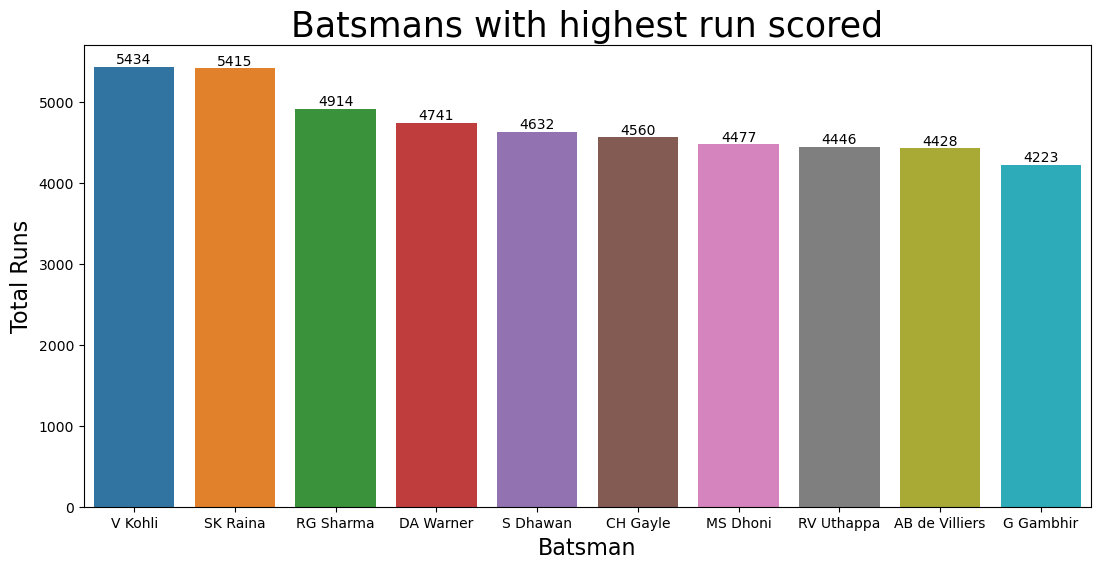

In [141]:
plt.figure(figsize=(13,6))
aviz=sns.barplot(a,x='batsman',y='batsman_runs')
plt.bar_label(container=aviz.containers[0],fmt="%.f")
plt.xlabel("Batsman",fontsize=16)
plt.ylabel("Total Runs",fontsize=16)
plt.title("Batsmans with highest run scored",fontsize=25)
plt.show()

##### Observations ::

1. V Kohli and SK Raina are top two run getters.
2. In top 10 run getters only 3 are foreigners rest are indian players.
-------

In [142]:
df1.batting_team=df1.batting_team.str.replace("Rising Pune Supergiants","Rising Pune Supergiant")

In [143]:
b=df1.groupby("batting_team").sum().reset_index()

C:\Users\Deepak  Dugar\AppData\Local\Temp\ipykernel_12808\1381342020.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  b=df1.groupby("batting_team").sum().reset_index()


## 2. Teams which scored highest runs

Text(0.5, 1.0, 'Total runs scored per team')

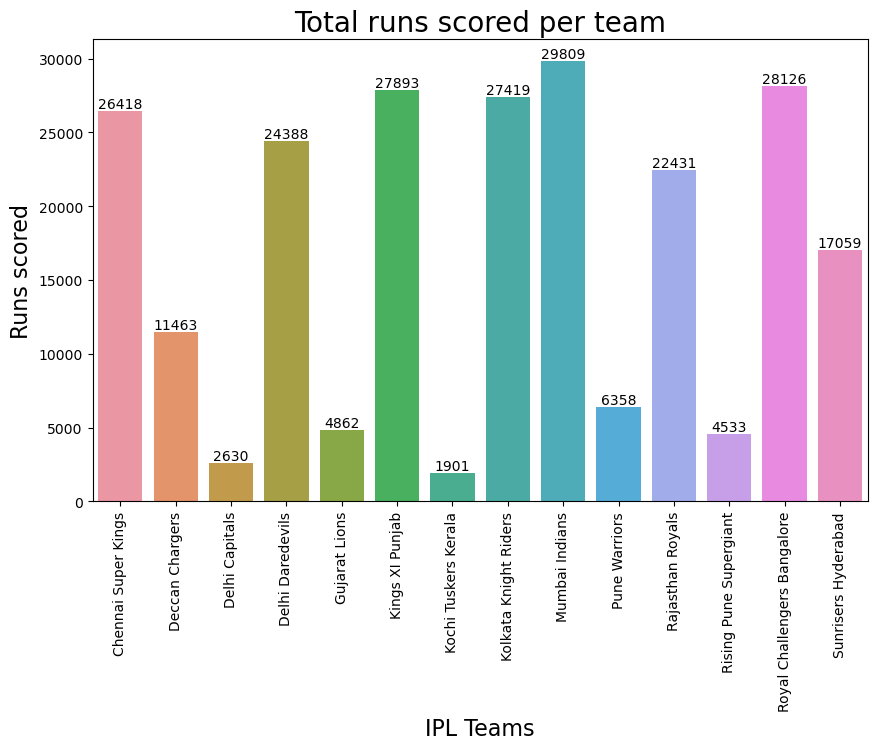

In [144]:
plt.figure(figsize=(10,6))
bviz=sns.barplot(b,x="batting_team",y='total_runs')
plt.bar_label(container=bviz.containers[0],fmt="%.f")
plt.xticks(rotation=90)
plt.xlabel("IPL Teams",fontsize=16)
plt.ylabel("Runs scored",fontsize=16)
plt.title("Total runs scored per team",fontsize=20)

##### Observations ::

1. MI & RCB are top 2 teams who scored highest runs across the seasons. 
-----

## 3. Bowlerss with highest Wickets

Text(0, 0.5, 'Total Wicket Taken')

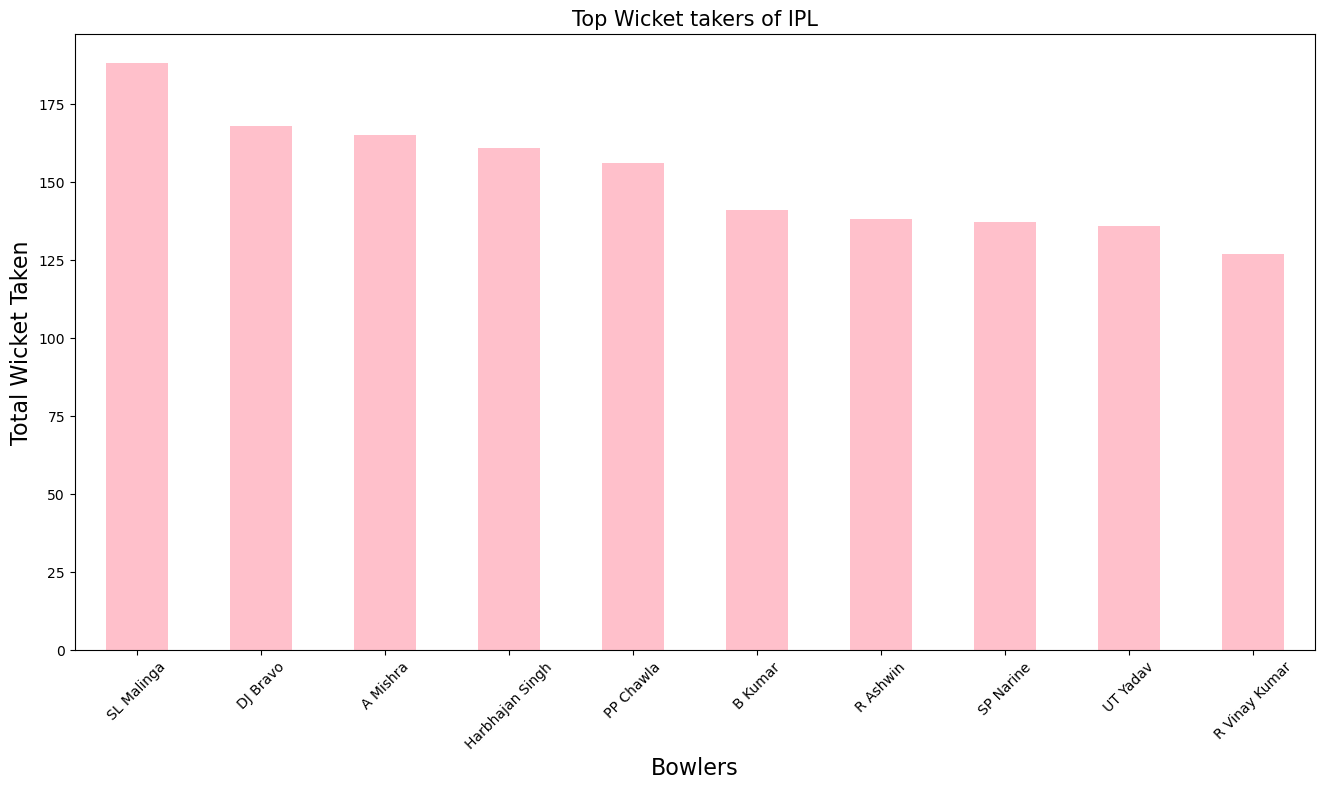

In [145]:
df1.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(16,8), color='pink')
plt.title('Top Wicket takers of IPL', fontsize=15)
plt.xlabel('Bowlers', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total Wicket Taken', fontsize=16)

##### Observations ::

1. L Malinga and DJ Bravo are top 2 wicket takers in IPL across the seasons.
2. Out of top 5, 3 are spinners and all are indian.
-------

## 4. Top players with most man of the match awards

Text(0, 0.5, 'Frequency')

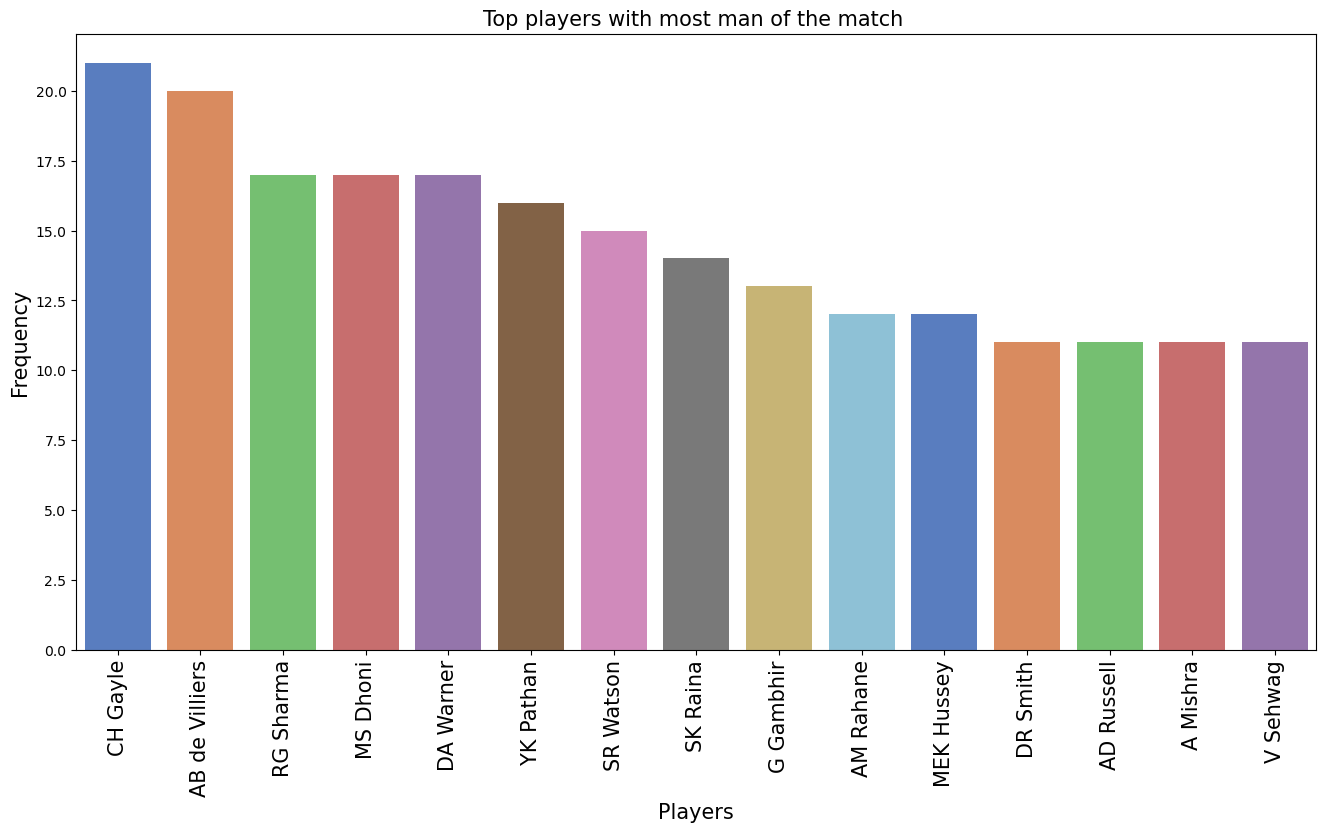

In [146]:
plt.figure(figsize=(16,8))
sns.countplot(x='player_of_match',data = matches,order=df1['player_of_match'].value_counts().head(15).index , palette='muted')
plt.title('Top players with most man of the match ', fontsize=15)
plt.xlabel('Players', fontsize=15)
plt.xticks(rotation=90,fontsize=15)
plt.ylabel('Frequency', fontsize=15)      

## 5. Batsman who stayed longer in the field

In [147]:
data=df1[['batsman','non_striker', 'bowler', 'batsman_runs', 'extra_runs', 'total_runs',   'batting_team', 'bowling_team']].copy()

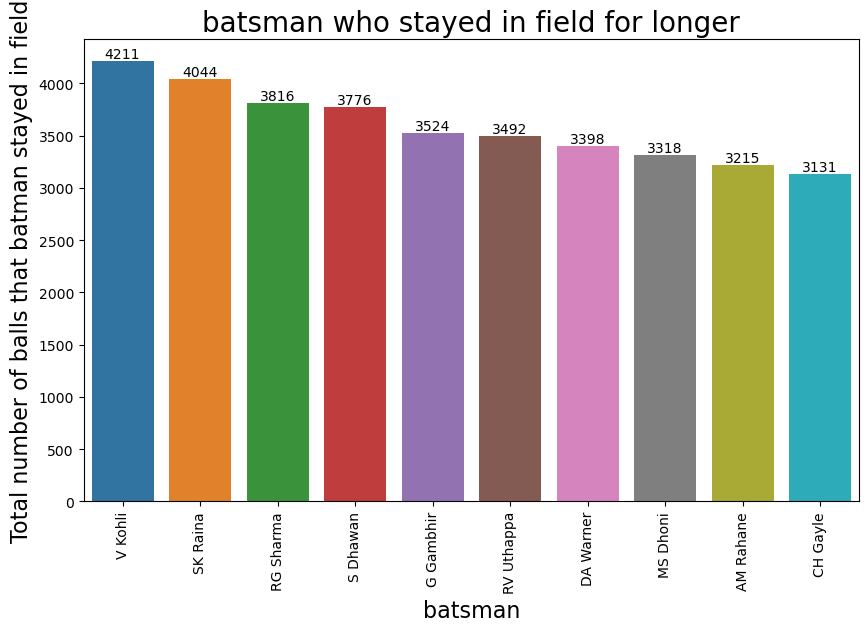

In [148]:
plt.figure(figsize=(10,6))
eplot=sns.countplot(data,x="batsman",order=data["batsman"].value_counts().iloc[0:10].index)
plt.bar_label(container=eplot.containers[0],fmt="%.f")
plt.xticks(rotation=90)
plt.xlabel("batsman",fontsize=16)
plt.ylabel("Total number of balls that batman stayed in field",fontsize=16)
plt.title("batsman who stayed in field for longer",fontsize=20)
plt.show()

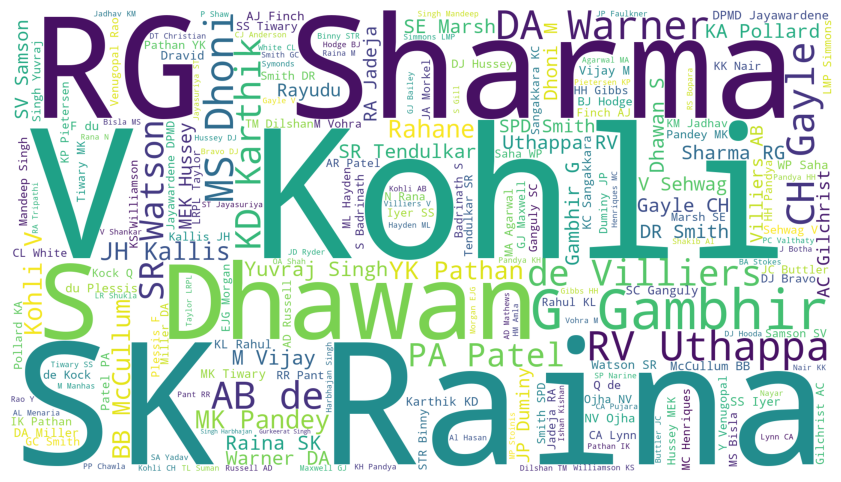

In [149]:
plt.figure(figsize=(15,6))
wd=wc(background_color="white",width=1920,height=1080).generate(" ".join(data.batsman))
plt.axis("off")
plt.imshow(wd)

##### Observations ::

1. V kohli and S raina are the 2 players who faced most deliveries in IPL.
2. Top 5 players who faced most deliveries are all Indian.
--------

## 6. Number of matches won by each team

Text(0.5, 1.0, 'Number of matches won by each team')

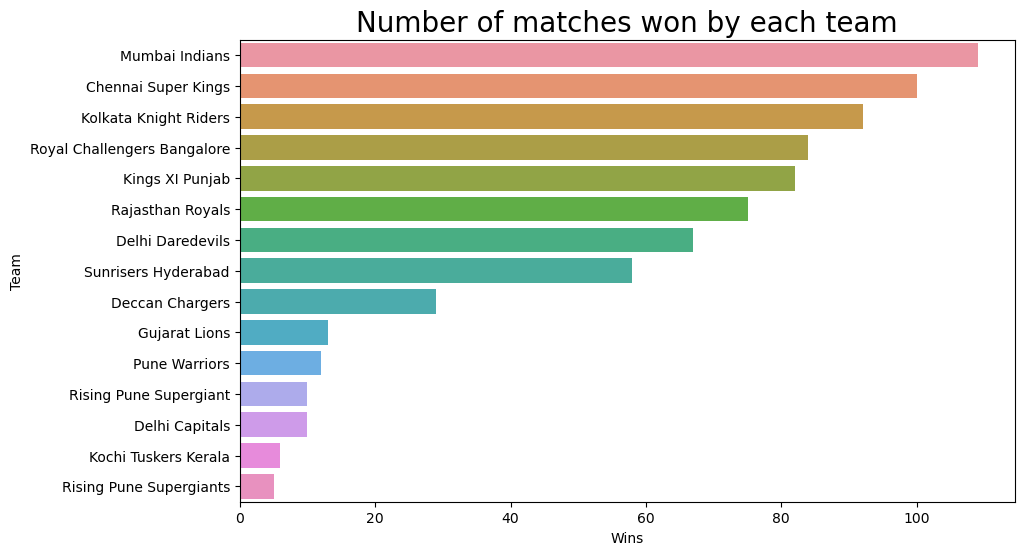

In [150]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = match,order= match['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of matches won by each team',fontsize=20)

##### Observations ::

Mumbai Indians have won the maximum number of IPL matches followed by Chennai Super Kings

--------

## 7. Total number of matches played in each stadium

Text(0.5, 1.0, 'Total number of matches played in each stadium')

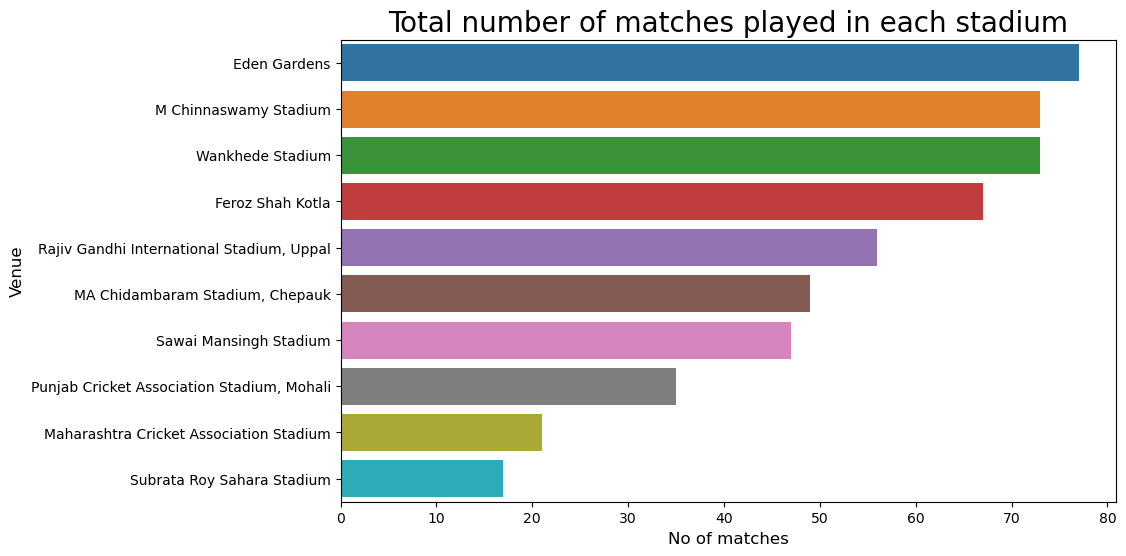

In [151]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = match,order = match['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total number of matches played in each stadium',fontsize=20)

##### Observations ::

Eden Gardens(Kolkata), M Chinnaswamy Stadium(Bengaluru) and Wankhede Stadium(Mumbai) are the venues who hosted maximum number of IPL Matches.

--------

## 8. Toss Decision

Text(0.5, 1.0, 'Toss Decision')

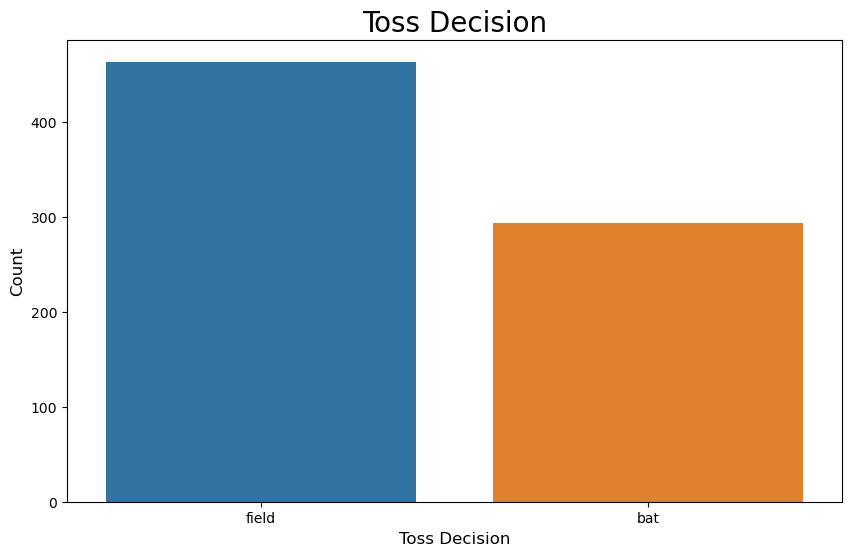

In [152]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=match)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision',fontsize=20)

##### Observations ::

Captains often prioritize chasing scores over batting first after winning the toss in IPL matches.

--------
-------

------

##  Data Preprocessing

##Requirement ---->> we want to have a data frame which has only following columns to give predictions.

#1. Batting Team

#2. Bowling Team

#3. City

#4. Runs_left

#5. Balls_left

#6. Wickets_left

#7. Total runs by 1st batting team

#8. Crr

#9. Rrr

#10.Result

In [153]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index() 
## we want to calculate total runs in each innings.

C:\Users\Deepak  Dugar\AppData\Local\Temp\ipykernel_12808\2190738187.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()


In [154]:
total_score_df = total_score_df[total_score_df['inning'] == 1] 
## here we want only those records which consist only 1st innings score bcz we want the probabilities of winning in 2nd inning. 

In [155]:
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [156]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
## merging total score data to match.

In [157]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [158]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [159]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [160]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
## since these teams changed their names during different seasons of IPL.

In [161]:
match_df = match_df[match_df['team1'].isin(teams)] # In column team1 put only those columns which are in team(created above)
match_df = match_df[match_df['team2'].isin(teams)] # In column team2 put only those columns which are in team(created above)

In [162]:
match_df.shape

(641, 20)

In [163]:
match_df = match_df[match_df['dl_applied'] == 0]
## we dont want such records which has dl rule applied.

In [164]:
match_df = match_df[['match_id','city','winner','total_runs']]
## wew want to extract only some columns in our final dataset from this dataset.

In [165]:
delivery_df = match_df.merge(delivery,on='match_id')
## merging delivery and match dataset.

In [166]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
## filtering recording of only 2nd innings.

In [167]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [168]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']
## to find total runs after each ball.that current score after each ball. and storing it in a new column.

C:\Users\Deepak  Dugar\AppData\Local\Temp\ipykernel_12808\1635410858.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [169]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']
## calculating runs left after each ball and storing it in a new column

In [170]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
## balls left after each delivery.

In [171]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118


In [172]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")  ## fill 0 inplace NaN
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1") ## if x is 0 leave it as it is else 1(if there is name of any batsman)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')  ## convering column to integer
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values    ## appling cummulative sum
delivery_df['wickets'] = 10 - wickets
delivery_df.head(2)
## here we are calculating wickets left after each ball.

C:\Users\Deepak  Dugar\AppData\Local\Temp\ipykernel_12808\1737038816.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values    ## appling cummulative sum


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10


In [173]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10


In [174]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [175]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
## required run rate

In [176]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0
## we are doing it to convert result of match in terms of 0 &1.Here we are creating a UDF

In [177]:
delivery_df['result'] = delivery_df.apply(result,axis=1)
## Applying UDF.

In [178]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]
## Required dataframe

In [179]:
final_df = final_df.sample(final_df.shape[0])
## Shuffleing the dataframe to avoid bais

In [180]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
53472,Kings XI Punjab,Mumbai Indians,Mumbai,156,108,9,159,1.5,8.666667,0


In [181]:
final_df.dropna(inplace=True)
## removing nulls in city columns.

In [182]:
final_df = final_df[final_df['balls_left'] != 0]
## since in the end rrr and crr tends to infinity so removing the rows which has balls left = 0.

In [72]:
le=LabelEncoder()

In [73]:
final_df[final_df.select_dtypes(include='object').columns]=final_df[final_df.select_dtypes(include='object').columns].apply(le.fit_transform)

## Sampling

In [183]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
## performing 80:20 train-test split. 

In [184]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
22534,Delhi Daredevils,Royal Challengers Bangalore,Port Elizabeth,105,83,8,149,7.135135,7.590361
78033,Mumbai Indians,Kolkata Knight Riders,Kolkata,84,66,8,159,8.333333,7.636364
745,Mumbai Indians,Kolkata Knight Riders,Mumbai,8,5,4,178,8.869565,9.600000
34286,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata,24,38,9,135,8.121951,3.789474
110367,Mumbai Indians,Chennai Super Kings,Chennai,84,71,10,158,9.061224,7.098592
...,...,...,...,...,...,...,...,...,...
37126,Chennai Super Kings,Kings XI Punjab,Chennai,59,55,9,136,7.107692,6.436364
114414,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,215,113,10,227,10.285714,11.415929
92174,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,145,105,8,155,4.000000,8.285714
146,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,169,98,10,207,10.363636,10.346939


# Logistics Regression

In [67]:
 param_grid = {
     'penalty': ['l1', 'l2'],                           # Regularization penalty
     'C': [0.001, 0.01, 0.1, 1, 10, 100],               # Inverse of regularization strength
     'solver': ['liblinear'],                           # Algorithms to use in the optimization problem
     'max_iter': [100, 200, 300]                        # Maximum number of iterations taken for the solvers to converge
 }

In [68]:
log= LogisticRegression()

In [70]:
grid_search = GridSearchCV(log, param_grid, cv=5, n_jobs=-1)

In [75]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [76]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.001, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}


In [185]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse_output=False,drop='first'),['batting_team','bowling_team','city'])],remainder='passthrough')
## 3 columns which are in the form of string we are convering them into integer.

In [186]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', StandardScaler())
    ('step3', LogisticRegression(C=0.001, max_iter=200, penalty='l1', solver='liblinear'))
])

In [187]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2',
                 LogisticRegression(C=100, max_iter=500, penalty='l1',
                                    solver='liblinear'))])

In [188]:
y_pred = pipe.predict(X_test)

In [198]:
pipe.predict_proba(X_test)[20]

array([0.18822698, 0.81177302])

## Confusion Matrix And Performance Indicators

In [117]:
score_log = cross_val_score(pipe,X_train,y_train,cv = 8)
score_log.mean()

0.8045298370987745

In [108]:
mat_test = confusion_matrix(y_test , y_pred)
mat_test

array([[5197, 1529],
       [1383, 6160]], dtype=int64)

In [116]:
accuracy_score(y_test,y_pred)

0.7959212278365688

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      6726
           1       0.80      0.82      0.81      7543

    accuracy                           0.80     14269
   macro avg       0.80      0.79      0.79     14269
weighted avg       0.80      0.80      0.80     14269



## Checking Model Performance

In [190]:
def match_summary(row):   
       print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
## Print a summary of the match based on the information in the given row.
## A row of a DataFrame containing match information.such as Batting Team,Bowling,TeamTarget Runs

In [191]:
def match_progression(x_df,match_id,pipe): 
     """
   Calculate match progression based on the given data.

  Parameters:
   - x_df (pd.DataFrame): The input DataFrame containing match data.
   - match_id (int): The ID of the match to analyze.
   - pipe: The machine learning model used for predictions.

   Returns:
   - temp_df (pd.DataFrame): DataFrame containing calculated match progression data.
   - target (int): The target runs for the match.
   """
    # Function code...
    match = x_df[x_df['match_id'] == match_id]                     # Filter data for the specified match_id and balls equal to 6
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]           # Create a DataFrame with selected columns and drop NaN values
    result = pipe.predict_proba(temp_df)                    # Predict probabilities using the machine learning model
    
    # Calculate additional information...
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)                              # Calculate runs after each over
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)                             # Calculate wickets in each over
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [192]:
temp_df,target = match_progression(delivery_df,74,pipe) ## Here i can change match  number
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,56.6,43.4
10467,2,8,0,51.3,48.7
10473,3,1,0,57.9,42.1
10479,4,7,1,69.7,30.3
10485,5,12,0,59.7,40.3
10491,6,13,0,47.4,52.6
10497,7,9,0,41.5,58.5
10505,8,15,0,27.7,72.3
10511,9,7,0,25.5,74.5
10518,10,17,0,14.0,86.0


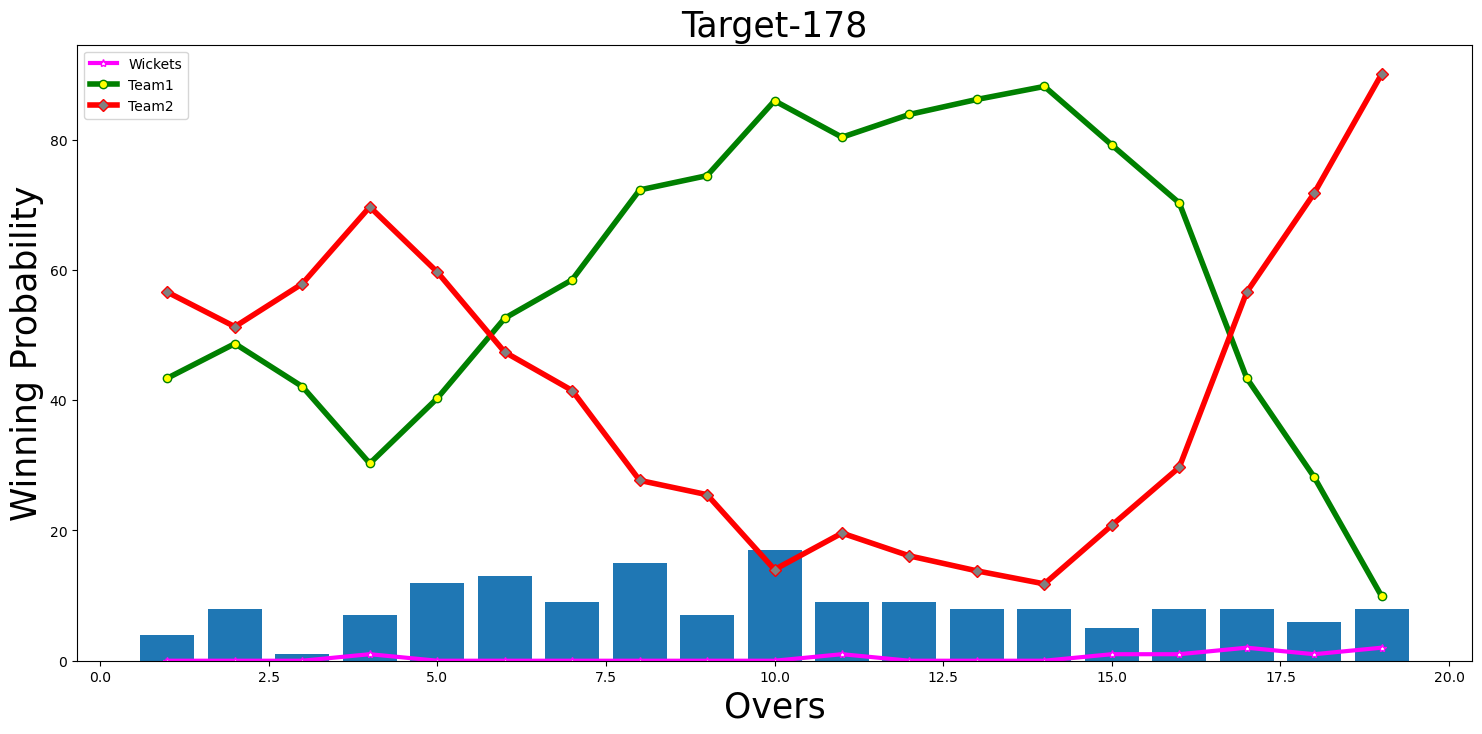

In [193]:
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'], marker = "*",color='magenta',linewidth=3,label = 'Wickets',mfc= 'white')
plt.plot(temp_df['end_of_over'],temp_df['win'], marker = "o",color='green',linewidth=4,label = 'Team1',mfc= 'yellow')
plt.plot(temp_df['end_of_over'],temp_df['lose'], marker = "D",color='red',linewidth=4,label = 'Team2',mfc= 'grey')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.xlabel("Overs",size = 25)
plt.ylabel("Winning Probability",size = 25)
plt.title('Target-'   +str(target),size = 25)
plt.legend()

## Conclusion - 

<p style="font-family: Times New India; font-size:1.3em;">
The final model is Logistic Regression which is giving the highest accuracy (80% approx).</br></br> 
In summary, the IPL Win Probability Predictor, employing machine learning, offers real-time forecasts of teams' victory chances after each delivery. Utilizing advanced algorithms and historical data, the model enhances cricket analysis by dynamically considering key game factors. This innovative tool not only elevates the viewing experience but also provides valuable strategic insights for teams and analysts, making it an indispensable asset in the realm of cricket analytics.</p>

--------
--------
--------
-------

-----